<a href="https://colab.research.google.com/github/RusBuin/fuzzy/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.8 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

100%|██████████| 2.71M/2.71M [00:00<00:00, 34.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [ ]:
import os

destination_path = '/content/drive/MyDrive/MLearning/'
print(os.listdir(destination_path))

['car_ad.csv', 'cvičenie2_3_4.ipynb', 'train.csv', 'cancer_diagnostic.csv', 'cvičenie5_6.ipynb', 'titanic_data_full.xlsx', 'student_scores.csv', 'test.csv']


In [ ]:
import shutil
import os

source_path = path
destination_path = '/content/drive/MyDrive/MLearning/'

os.makedirs(destination_path, exist_ok=True)

for item in os.listdir(source_path):
    s = os.path.join(source_path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)

print(f"Dataset copied to: {destination_path}")

Dataset copied to: /content/drive/MyDrive/MLearning/


In [ ]:
import pandas as pd
import os

dataset_path = '/content/drive/MyDrive/MLearning/'

train_df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

combined_df = pd.concat([train_df, test_df], ignore_index=True)

display(combined_df.head())

combined_df.info()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
combined_df = combined_df.drop(combined_df.columns[0], axis=1)

display(combined_df.head())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
import pandas as pd

combined_df = combined_df.drop(combined_df.columns[0], axis=1)

combined_df = combined_df.rename(columns={
    'Seat comfort': 'comfort',
    'Inflight service': 'service',
    'Cleanliness': 'cleanliness',
    'satisfaction': 'satisfied'
})

combined_df = combined_df[['comfort', 'service', 'cleanliness', 'satisfied']]

display(combined_df.head())

,comfort,service,cleanliness,satisfied
0,5,5,5,neutral or dissatisfied
1,1,4,1,neutral or dissatisfied
2,5,4,5,satisfied
3,2,4,2,neutral or dissatisfied
4,5,3,3,satisfied


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

comfort = ctrl.Antecedent(np.arange(0, 6, 1), 'comfort')
service = ctrl.Antecedent(np.arange(0, 6, 1), 'service')
cleanliness = ctrl.Antecedent(np.arange(0, 6, 1), 'cleanliness')
satisfaction = ctrl.Consequent(np.arange(0, 1.01, 0.1), 'satisfaction')

comfort['low'] = fuzz.trimf(comfort.universe, [0, 0, 3])
comfort['medium'] = fuzz.trimf(comfort.universe, [1, 3, 5])
comfort['high'] = fuzz.trimf(comfort.universe, [3, 5, 5])

service['low'] = fuzz.trimf(service.universe, [0, 0, 3])
service['medium'] = fuzz.trimf(service.universe, [1, 3, 5])
service['high'] = fuzz.trimf(service.universe, [3, 5, 5])

cleanliness['low'] = fuzz.trimf(cleanliness.universe, [0, 0, 3])
cleanliness['medium'] = fuzz.trimf(cleanliness.universe, [1, 3, 5])
cleanliness['high'] = fuzz.trimf(cleanliness.universe, [3, 5, 5])

satisfaction['low'] = fuzz.trimf(satisfaction.universe, [0.0, 0.0, 0.5])
satisfaction['medium'] = fuzz.trimf(satisfaction.universe, [0.2, 0.5, 0.8])
satisfaction['high'] = fuzz.trimf(satisfaction.universe, [0.6, 1.0, 1.0])

rule1 = ctrl.Rule(comfort['high'] & service['high'] & cleanliness['high'], satisfaction['high'])
rule2 = ctrl.Rule(comfort['medium'] | service['medium'], satisfaction['medium'])
rule3 = ctrl.Rule(comfort['low'] & service['low'], satisfaction['low'])

satisfaction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

def calculate_fuzzy_row(row):
    fuzzy_system = ctrl.ControlSystemSimulation(satisfaction_ctrl)
    fuzzy_system.input['comfort'] = float(row['comfort'])
    fuzzy_system.input['service'] = float(row['service'])
    fuzzy_system.input['cleanliness'] = float(row['cleanliness'])
    fuzzy_system.compute()
    if 'satisfaction' in fuzzy_system.output:
        return fuzzy_system.output['satisfaction']
    else:
        return np.nan

combined_df['satisfaction_fuzzy'] = combined_df.apply(calculate_fuzzy_row, axis=1)
combined_df = combined_df.dropna(subset=['satisfaction_fuzzy'])

display(combined_df.head(10))
mean_score = combined_df['satisfaction_fuzzy'].mean()
print(f"Priemerná spokojnosť (fuzzy model): {mean_score:.2f}")

,comfort,service,cleanliness,satisfied,satisfaction_fuzzy
0,5,5,5,neutral or dissatisfied,0.866667
1,1,4,1,neutral or dissatisfied,0.500000
2,5,4,5,satisfied,0.633333
3,2,4,2,neutral or dissatisfied,0.500000
4,5,3,3,satisfied,0.500000
5,1,4,1,neutral or dissatisfied,0.500000
6,2,5,2,neutral or dissatisfied,0.500000
7,5,5,4,satisfied,0.844444
8,3,1,2,neutral or dissatisfied,0.500000
9,3,3,2,neutral or dissatisfied,0.500000


Priemerná spokojnosť (fuzzy model): 0.55


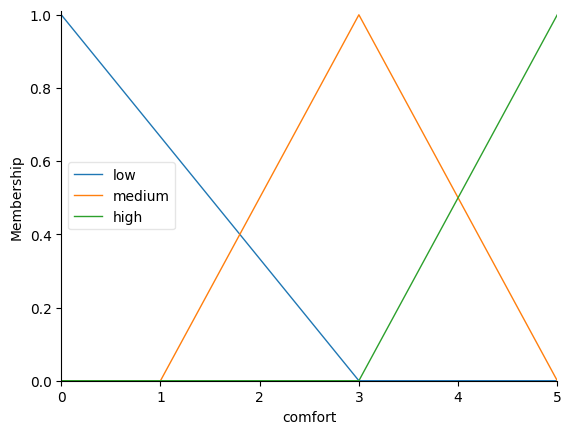

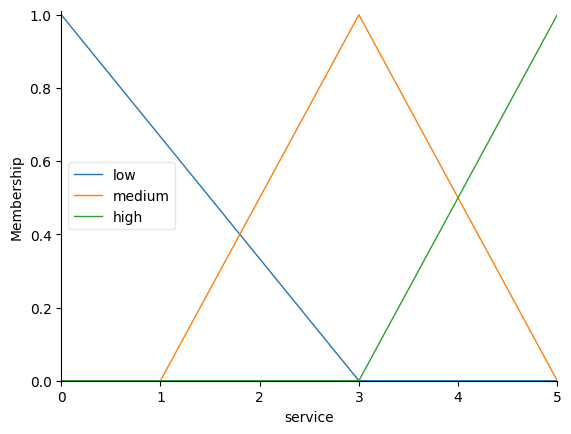

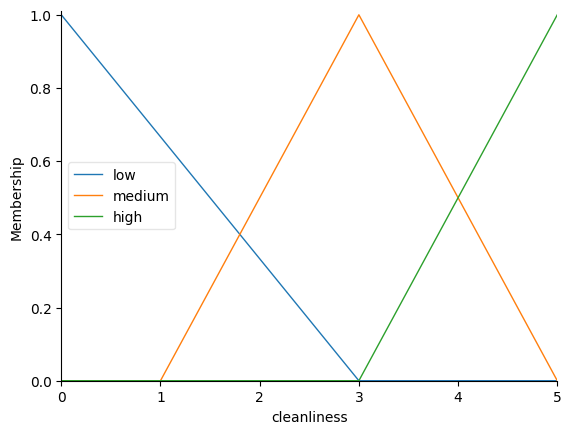

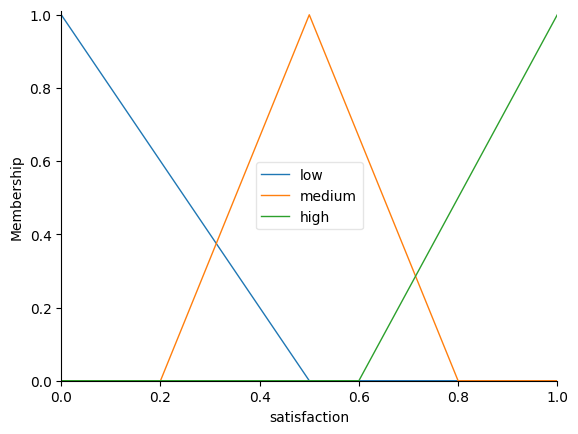

In [ ]:
import matplotlib.pyplot as plt

comfort.view()
service.view()
cleanliness.view()
satisfaction.view()
plt.show()

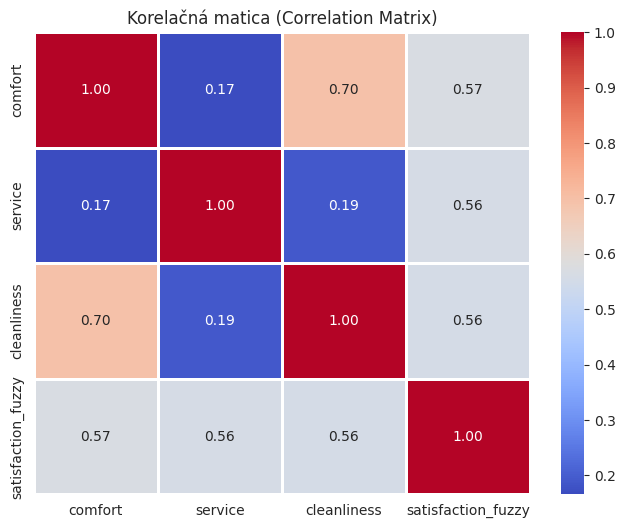

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
corr_data = combined_df[['comfort', 'service', 'cleanliness', 'satisfaction_fuzzy']]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Korelačná matica (Correlation Matrix)')
plt.show()